In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sihabmahmud","key":"e03f8af0c763c57aeb743ca3766dd5b4"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [ ]:
!kaggle datasets download -d baronn/lettuce-npk-dataset

 96% 323M/337M [00:03<00:00, 151MB/s]
100% 337M/337M [00:03<00:00, 110MB/s]


In [ ]:
!unzip lettuce-npk-dataset.zip

Archive:  lettuce-npk-dataset.zip
  inflating: FNNPK/-K/k_1.png        
  inflating: FNNPK/-K/k_10.png       
  inflating: FNNPK/-K/k_11.png       
  inflating: FNNPK/-K/k_12.png       
  inflating: FNNPK/-K/k_13.png       
  inflating: FNNPK/-K/k_14.png       
  inflating: FNNPK/-K/k_15.png       
  inflating: FNNPK/-K/k_16.png       
  inflating: FNNPK/-K/k_17.png       
  inflating: FNNPK/-K/k_18.png       
  inflating: FNNPK/-K/k_19.png       
  inflating: FNNPK/-K/k_2.png        
  inflating: FNNPK/-K/k_20.png       
  inflating: FNNPK/-K/k_21.png       
  inflating: FNNPK/-K/k_22.png       
  inflating: FNNPK/-K/k_23.png       
  inflating: FNNPK/-K/k_24.png       
  inflating: FNNPK/-K/k_25.png       
  inflating: FNNPK/-K/k_26.png       
  inflating: FNNPK/-K/k_27.png       
  inflating: FNNPK/-K/k_28.png       
  inflating: FNNPK/-K/k_29.png       
  inflating: FNNPK/-K/k_3.png        
  inflating: FNNPK/-K/k_30.png       
  inflating: FNNPK/-K/k_31.png       
  inflating: FNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalMaxPooling2D,Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import pandas as pd
import os, requests, cv2, random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Set the paths for input and output folders
input_folder = '/content/FNNPK'
output_folder = '/content/drive/MyDrive/Lettuce_augmented'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Create an ImageDataGenerator with your desired augmentation settings
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Loop through each subfolder in the input folder
for subfolder in os.listdir(input_folder):
    subfolder_path = os.path.join(input_folder, subfolder)

    if os.path.isdir(subfolder_path):
        # Create corresponding output subfolder if it doesn't exist
        output_subfolder = os.path.join(output_folder, subfolder)
        if not os.path.exists(output_subfolder):
            os.makedirs(output_subfolder)

        # Loop through each image in the subfolder and apply augmentation
        for filename in os.listdir(subfolder_path):
            if filename.endswith(('.jpg', '.jpeg', '.png')):  # Assuming your images are in these formats
                img = load_img(os.path.join(subfolder_path, filename))
                x = img_to_array(img)
                x = x.reshape((1,) + x.shape)

                # Generate augmented images and save to the output subfolder
                i = 0
                for batch in datagen.flow(x, batch_size=1, save_to_dir=output_subfolder,
                                          save_prefix=os.path.splitext(filename)[0], save_format='jpeg'):
                    i += 1
                    if i > 30:
                        break  # limit the number of augmented images per original image

print("Data augmentation complete.")


Data augmentation complete.


In [ ]:
pip install split-folders[full]

In [ ]:
import splitfolders
input_folder='/content/drive/MyDrive/Lettuce_augmented'
splitfolders.ratio(input_folder, output="/content/drive/MyDrive/lettuceData",
    seed=42, ratio=(.7,.2,.1), group_prefix=None, move=False)

Copying files: 6438 files [01:06, 96.52 files/s] 


In [ ]:
train_datasets = "/content/drive/MyDrive/lettuceData/train"
validation_datasets = "/content/drive/MyDrive/lettuceData/val"
test_datasets = "/content/drive/MyDrive/lettuceData/test"

In [ ]:
batch_size = 64
image_size =[ 224,224]

In [ ]:
def prepare_the_datasets(train_datasets, validation_datasets, batch_size, image_size):
    train_datasets_generator = ImageDataGenerator(rescale=1./255,
                                                  shear_range = 0.2,
                                                  zoom_range = 0.2,
                                                  horizontal_flip = True,
                                                  vertical_flip=True,
                                                  brightness_range=[0.1, 1.5],
                                                  fill_mode = "nearest")


    validation_datasets_generator = ImageDataGenerator(rescale=1./255,
                                                  shear_range = 0.2,
                                                  zoom_range = 0.2,
                                                  horizontal_flip = True,
                                                  vertical_flip=True,
                                                  brightness_range=[0.1, 1.5],
                                                  fill_mode = "nearest")


    train_datasets_generator_data = train_datasets_generator.flow_from_directory(
        batch_size = 64,
        directory = train_datasets,
        shuffle = True,
        target_size = [224,224],
        class_mode = "categorical"
    )

    validation_datasets_generator_data = validation_datasets_generator.flow_from_directory(
        batch_size = 64,
        directory = validation_datasets,
        shuffle = True,
        target_size = [224,224],
        class_mode = "categorical"
    )


    return train_datasets_generator_data, validation_datasets_generator_data


In [ ]:
train_data , validation_data = prepare_the_datasets(train_datasets, validation_datasets,batch_size = 64 ,image_size =[ 224,224])

Found 4505 images belonging to 4 classes.
Found 1287 images belonging to 4 classes.


vgg


In [ ]:
from keras.applications.vgg19 import VGG19
from sklearn.model_selection import KFold, ShuffleSplit
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [ ]:
model2 = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32,(3,3),strides=(1, 1),activation='relu',padding='same', input_shape=(224, 224, 3)),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

tf.keras.layers.Conv2D(64,(3,3),strides=(1, 1) ,padding='same',activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

tf.keras.layers.Conv2D(128,(3,3),strides=(1, 1),padding='same', activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

tf.keras.layers.Conv2D(256,(3,3),strides=(1, 1),padding='same', activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),


tf.keras.layers.Flatten(),

tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(4, activation='softmax'),
    ])


In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 128)       0

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
model2.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
es = EarlyStopping(monitor = 'val_accuracy',
                   mode = 'max',
                   patience = 20,
                   verbose = 1,
                   restore_best_weights = True)

In [ ]:
import tensorflow as tf

In [ ]:
model2_fit = model2.fit(train_data,
                    validation_data = validation_data,
                    validation_steps = len(validation_data),
                    steps_per_epoch = len(train_data),
                    epochs = 15,
                    callbacks = [es])

Epoch 1/15
71/71 [==============================] - 139s 2s/step - loss: 0.0822 - accuracy: 0.9463 - val_loss: 0.0433 - val_accuracy: 0.9782
Epoch 2/15
71/71 [==============================] - 126s 2s/step - loss: 0.0357 - accuracy: 0.9754 - val_loss: 0.0215 - val_accuracy: 0.9876
Epoch 3/15
71/71 [==============================] - 130s 2s/step - loss: 0.0221 - accuracy: 0.9851 - val_loss: 0.0690 - val_accuracy: 0.9534
Epoch 4/15
71/71 [==============================] - 143s 2s/step - loss: 0.0126 - accuracy: 0.9922 - val_loss: 0.0172 - val_accuracy: 0.9883
Epoch 5/15
71/71 [==============================] - 130s 2s/step - loss: 0.0301 - accuracy: 0.9789 - val_loss: 0.0256 - val_accuracy: 0.9821
Epoch 6/15
71/71 [==============================] - 129s 2s/step - loss: 0.0198 - accuracy: 0.9865 - val_loss: 0.0103 - val_accuracy: 0.9930
Epoch 7/15
71/71 [==============================] - 127s 2s/step - loss: 0.0233 - accuracy: 0.9818 - val_loss: 0.0131 - val_accuracy: 0.9915
Epoch 8/15
71

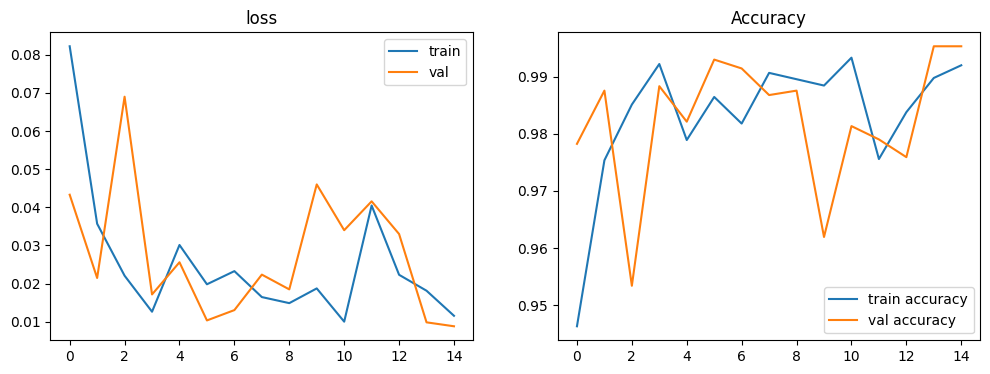

In [ ]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    #ax1.set_ylim(-0.1, 0.1)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    #ax2.set_ylim(0.9, 1.1)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

plot_history(model2_fit, title='', axs=None, exp_name="");

In [ ]:
# CNN model layers

cnn = models.Sequential()

cnn.add(layers.Conv2D (32, kernel_size = (3,3), activation='relu', input_shape = [224, 224,3])),
cnn.add(layers.MaxPooling2D(pool_size = (2, 2))),

cnn.add(layers.Conv2D(64, (3,3), activation='relu')),
cnn.add(layers. MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D (64, (3,3), activation='relu')),
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D(64, (3, 3), activation='relu')),
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers. Conv2D (64, (3, 3), activation='relu')),
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D(64, (3, 3), activation='relu')),
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Flatten()),

cnn.add(layers.Dense(64,activation='relu'))
#output layer
cnn.add(layers.Dense(4, activation='softmax'))



In [ ]:
cnn.summary()

In [ ]:
from tensorflow import keras

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
cnn.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor = 'val_accuracy',
                   mode = 'max',
                   patience = 20,
                   verbose = 1,
                   restore_best_weights = True)

In [ ]:
history = cnn.fit(
    x=train_data,
    epochs=15,
    validation_data=validation_data,
)


Epoch 1/15
71/71 [==============================] - 148s 2s/step - loss: 0.9065 - accuracy: 0.5407 - val_loss: 0.7096 - val_accuracy: 0.6830
Epoch 2/15
71/71 [==============================] - 134s 2s/step - loss: 0.5529 - accuracy: 0.7616 - val_loss: 0.4806 - val_accuracy: 0.8011
Epoch 3/15
71/71 [==============================] - 139s 2s/step - loss: 0.4637 - accuracy: 0.8149 - val_loss: 0.3791 - val_accuracy: 0.8601
Epoch 4/15
71/71 [==============================] - 131s 2s/step - loss: 0.4284 - accuracy: 0.8342 - val_loss: 0.3489 - val_accuracy: 0.8469
Epoch 5/15
71/71 [==============================] - 127s 2s/step - loss: 0.3349 - accuracy: 0.8772 - val_loss: 0.2238 - val_accuracy: 0.9200
Epoch 6/15
71/71 [==============================] - 130s 2s/step - loss: 0.2694 - accuracy: 0.9034 - val_loss: 0.2318 - val_accuracy: 0.9145
Epoch 7/15
71/71 [==============================] - 131s 2s/step - loss: 0.2747 - accuracy: 0.9006 - val_loss: 0.2323 - val_accuracy: 0.9106
Epoch 8/15
71

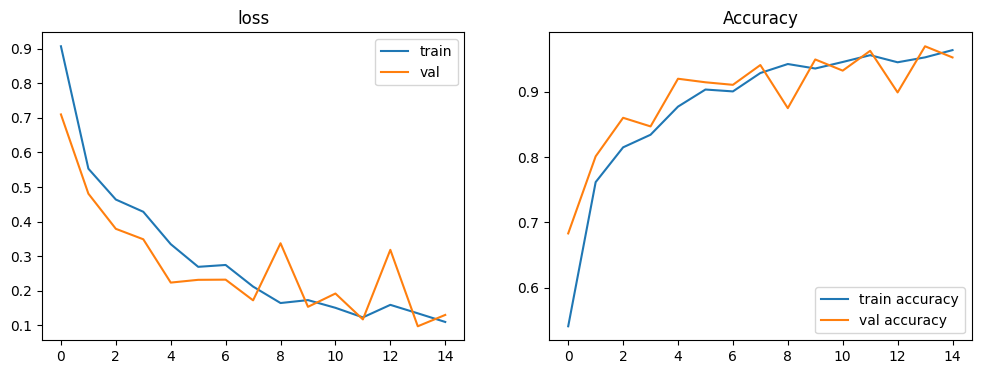

In [ ]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    #ax1.set_ylim(-0.1, 0.1)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    #ax2.set_ylim(0.9, 1.1)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

plot_history(history, title='', axs=None, exp_name="");

In [ ]:
image_path = '/content/FNNPK/-N/n_1.png'
img = cv2.imread(image_path)
img = cv2.resize(img, (224, 224))
img = img / 255.0

img = np.expand_dims(img, axis=0)

predictions = cnn.predict(img)

predicted_class = np.argmax(predictions, axis=1)

class_labels = list(train_data.class_indices.keys())


predicted_class_label = class_labels[predicted_class[0]]

print("Predicted class:", predicted_class_label)


1/1 [==============================] - 0s 19ms/step
Predicted class: -P
